In [1]:
from Model import SegNetModel
from HyperparameterOptimization import findOptimalBatchSize
from keras.models import load_model
from Utilities.Metrics import precision, recall, f1, f2, iou, pred_area, true_area
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
model = SegNetModel("noname")
model.model = load_model("1024_residual_noargmax.hd5", custom_objects={'precision': precision, 'recall':recall, 'f1':f1, 'f2': f2, 'iou': iou, 'pred_area': pred_area, 'true_area': true_area})

Done building encoder..
Done building decoder..


In [3]:
from keras.utils import to_categorical

test_label = np.ones((768,768))
onehot = to_categorical(test_label)
print(onehot.shape)

(768, 768, 2)


In [4]:

# print(model.model.summary())
acc = model.eval(1, reduced_size=1024, remove_nan=False)
print(acc)

[10.342916193546033, 0.3300826567426032, 0.3300826380431068, 0.33008259588706435, 0.33008262137973715, 0.2437894475673709, 589824.0021446078, 589824.0, 0.3300826585687259]


In [9]:
metric_dict = dict(zip(model.model.metrics_names, acc))
print(metric_dict)

{'true_area': 589824.0, 'pred_area': 589823.9987745098, 'f1': 0.33008239715013143, 'acc': 0.33008246032484606, 'loss': 10.342916614869061, 'iou': 0.24378923445885234, 'precision': 0.33008245747609466, 'f2': 0.33008242096277135, 'recall': 0.33008243958009226}


[[[1 0 0 ... 0 1 1]
  [0 0 0 ... 0 1 0]
  [0 0 0 ... 1 1 1]
  ...
  [0 1 1 ... 1 1 1]
  [0 1 1 ... 1 1 1]
  [0 0 1 ... 1 1 1]]]
(1, 768, 768)
[[1 0 0 ... 0 1 1]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 1 1]
 ...
 [0 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]
 [0 0 1 ... 1 1 1]]
(768, 768)


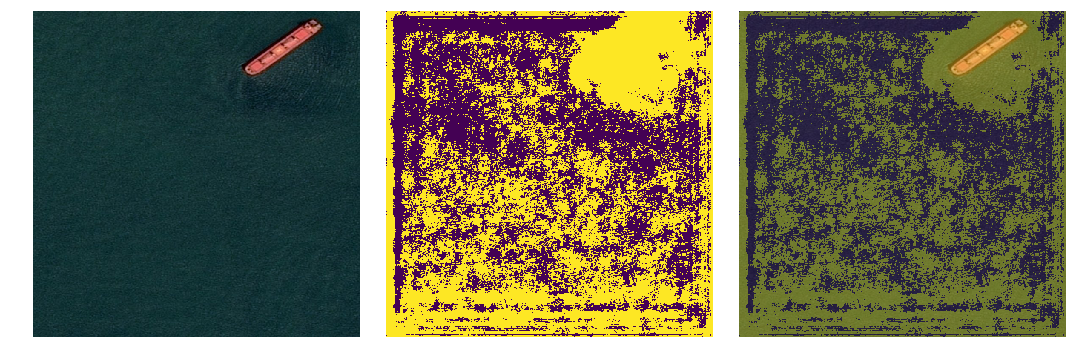

In [3]:
test_image = np.expand_dims(imread("data/train/00a52cd2a.jpg"),0)
prediction = np.argmax(model.model.predict(test_image), axis=-1)
# assert prediction.shape == (1,768,768,1)
print(prediction)
print(prediction.shape)
cut_prediction = np.reshape(prediction, (768,768))
print(cut_prediction)
print(cut_prediction.shape)
cut_img = test_image[0]

fig, axarr = plt.subplots(1, 3, figsize=(15, 40))
axarr[0].axis('off')
axarr[1].axis('off')
axarr[2].axis('off')
axarr[0].imshow(cut_img)
axarr[1].imshow(cut_prediction)
axarr[2].imshow(cut_img)
axarr[2].imshow(cut_prediction, alpha=0.4)
plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()